In [136]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [137]:
df_eventos = pd.read_csv("F:/Bibliotecas/Documentos/football-events/events.csv") #dt
df_dados_partida = pd.read_csv("F:/Bibliotecas/Documentos/football-events/ginf.csv") #dtt

In [138]:
df_eventos.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [284]:
evento_tentativa = 1 #Define o evento como tentativa de gol
na_meta = 1 
gol_true = 1         #Define o evento como gol
gol_false = 0        #Define que o evento não foi gol


In [140]:
##TRABALHANDO NOS VALORES DOS GOLS E TENTATIVAS

In [141]:
##Pegar colunas especificas do DataFrame, correspondente as finalizações
df_nova_eventos = df_eventos[['id_odsp', 'id_event', 'sort_order', 'text', 'event_type', 'event_type2','side', 'event_team',
                              'opponent','player', 'player2', 'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
                              'assist_method', 'situation']] #dct

# QUAL O PERCENTUAL DE ACERTOS NOS CHUTES DOS CLUBES?

## Reduzindo os dados do DataFrame para os desejados

### Guardando os valores de tentativas que foram gols

In [142]:
df_gols = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & (df_nova_eventos['is_goal'] == gol_true)
                          & (df_nova_eventos['shot_outcome'] >= na_meta)]

### Guardando os registros de tentativas que não foram gols

In [143]:
df_tentativas = df_nova_eventos[(df_nova_eventos['event_type'] == evento_tentativa) & 
                                (df_nova_eventos['is_goal'] == gol_false)]

In [144]:
df_gols.columns


Index(['id_odsp', 'id_event', 'sort_order', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'shot_place', 'shot_outcome', 'is_goal', 'location', 'bodypart',
       'assist_method', 'situation'],
      dtype='object')

In [145]:
##ACIMA A TENTATIVA DE RESPONDER A QUESTÃO 1 (EM ANDAMENTO)

In [146]:
dtt.columns

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

In [285]:
##Construindo um DataFrame com os valores necessários da tabela Ginf
dados_partida = df_dados_partida.columns[:-9] ##Não funciona (DESSA FORMA SÓ COPIA OS INDEXS)

In [148]:
df_dados_partida.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


## Criando uma junção natural entre os dois dataframes

In [149]:
gols = pd.merge(df_gols, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

## Agrupando os dados por time e temporada

In [160]:
##Agrupando o quantitativo de gols de cada time por temporada
gols_temporada = gols.groupby(['event_team', 'season']).count()

gols_temp_geral = gols_temporada = gols.groupby(['event_team']).count()

### Exibindo os gols de cada time por temporada

In [161]:
gols_temporada.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,110,110,110,110,110,76,110,110,110,76,...,110,110,110,110,110,110,0,0,0,0
AC Milan,320,320,320,320,320,203,320,320,320,201,...,320,320,320,320,320,320,31,31,31,31
AJ Auxerre,46,46,46,46,46,29,46,46,46,29,...,46,46,46,46,46,46,0,0,0,0
AS Monaco,228,228,228,228,228,149,228,228,228,147,...,228,228,228,228,228,228,64,64,64,64
AS Nancy Lorraine,87,87,87,87,87,63,87,87,87,63,...,87,87,87,87,87,87,16,16,16,16


## Reazlizando uma junção dos dataframes

In [152]:
##Agrupando o quantitativo de gols de cada time por temporada
df_tentativas_temporada = pd.merge(df_tentativas, df_dados_partida, how='inner', on=['id_odsp', 'id_odsp'])

#### Separando 2 dataframes, um agrupado por clube e outro por clube e emporada

In [237]:
tentativas_temporada = df_tentativas_temporada.groupby(['event_team', 'season']).count()

tentativas_temp_geral = df_tentativas_temporada.groupby(['event_team']).count()

In [239]:
tentativas_temp_geral.head()

,id_odsp,id_event,sort_order,text,event_type,event_type2,side,opponent,player,player2,...,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,992,992,992,992,992,686,992,992,992,686,...,992,992,992,992,992,992,0,0,0,0
AC Milan,2736,2736,2736,2736,2736,1999,2736,2736,2736,1999,...,2736,2736,2736,2736,2736,2736,254,254,254,254
AJ Auxerre,400,400,400,400,400,273,400,400,400,273,...,400,400,400,400,400,400,0,0,0,0
AS Monaco,1432,1432,1432,1432,1432,1072,1432,1432,1432,1072,...,1432,1432,1432,1432,1432,1432,216,216,216,216
AS Nancy Lorraine,970,970,970,970,970,728,970,970,970,726,...,970,970,970,970,970,970,182,182,182,182


#### Medindo a eficiencia por clube e temporada

In [154]:
eficiencia = (gols_temporada['id_event']/tentativas_temporada['id_event']) ##Questionar ao professor

In [164]:
eficiencia.head()

event_team  season
AC Ajaccio  2012      0.349206
            2013      0.302198
            2014      0.351438
AC Milan    2012      0.655738
            2013      0.560420
Name: id_event, dtype: float64

#### Medindo a eficiencia geral por clube

In [240]:
eficiencia_geral = (gols_temporada['id_event']/tentativas_temp_geral['id_event'])

In [279]:
eficiencia_geral.head()

event_team
AC Ajaccio           0.110887
AC Milan             0.116959
AJ Auxerre           0.115000
AS Monaco            0.159218
AS Nancy Lorraine    0.089691
Name: id_event, dtype: float64

#### Convertendo os objetos de Series para Frames, para poder utilizar os métodos da biblioteca matplotlib

In [263]:
df_eficiencia_geral = eficiencia_geral.to_frame()

In [264]:
df_eficiencia_geral.columns

Index(['id_event'], dtype='object')

In [244]:
df_eficiencia = eficiencia.to_frame()

#### Dados gerais do DataFrame de eficiencia geral

In [283]:
df_eficiencia_geral.describe()

,id_event
count,142.000000
mean,0.109163
std,0.024032
min,0.048969
25%,0.093166
50%,0.109676
75%,0.121182
max,0.216616


#### Definindo o histograma de eficiencia geral dos campeonatos

In [280]:
hist_eficiencia = plt.hist(df_eficiencia_geral['id_event'], bins = 50)


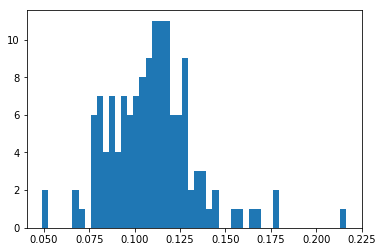

In [281]:
plt.show()